In [25]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
file_path = '/home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_15_58_51_2T3W1RFV0MC103811following_real_vehicle_FSth_margin.bag'
b = bagreader(file_path)

[INFO]  Data folder /home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_15_58_51_2T3W1RFV0MC103811following_real_vehicle_FSth_margin already exists. Not creating.


In [35]:
filename = file_path.split('/')[-1]

In [36]:
b.topic_table

Topics                       Types  Message Count  \
0                 /accel            std_msgs/Float64          37632   
1             /cmd_accel            std_msgs/Float64          37459   
2               /cmd_vel         geometry_msgs/Twist           7513   
3              /commands            std_msgs/Float64          37645   
4   /effective_lead_dist            std_msgs/Float64           7506   
5             /highbeams            std_msgs/Float64            377   
6             /lead_dist            std_msgs/Float64           3762   
7                /region              std_msgs/UInt8           7513   
8               /rel_vel         geometry_msgs/Twist           6263   
9                /rosout           rosgraph_msgs/Log             12   
10           /rosout_agg           rosgraph_msgs/Log             11   
11       /steering_angle            std_msgs/Float64          37658   
12          /timheadway1            std_msgs/Float64           7513   
13             /track_a0  geometry_msgs/PointStamped           7534   
14             /track_a1  geometry_msgs/PointStamped           7534   
15            /track_a10  geometry_msgs/PointStamped           7529   
16            /track_a11  geometry_msgs/PointStamped           7531   
17            /track_a12  geometry_msgs/PointStamped           7529   
18            /track_a13  geometry_msgs/PointStamped           7529   
19            /track_a14  geometry_msgs/PointStamped           7528   
20            /track_a15  geometry_msgs/PointStamped           7526   
21             /track_a2  geometry_msgs/PointStamped           7534   
22             /track_a3  geometry_msgs/PointStamped           7534   
23             /track_a4  geometry_msgs/PointStamped           7534   
24             /track_a5  geometry_msgs/PointStamped           7534   
25             /track_a6  geometry_msgs/PointStamped           7533   
26             /track_a7  geometry_msgs/PointStamped           7533   
27             /track_a8  geometry_msgs/PointStamped           7533   
28             /track_a9  geometry_msgs/PointStamped           7533   
29                  /vel         geometry_msgs/Twist          18821   

       Frequency  
0     190.884449  
1     272.021791  
2      19.976396  
3     100.021558  
4      19.957955  
5       0.999819  
6      83.241789  
7      19.978394  
8      26.226120  
9   20661.596059  
10  15363.750916  
11    100.747118  
12     19.978775  
13     19.994775  
14     19.980107  
15     20.002642  
16     19.993822  
17     20.002165  
18     20.020019  
19     20.012902  
20     20.008606  
21     20.005361  
22     19.992011  
23     19.993727  
24     19.985629  
25     19.995824  
26     20.007317  
27     20.002690  
28     19.996205  
29     50.060321

In [37]:
CMD_ACC_MSG = b.message_by_topic('/cmd_accel') #commanded accel
ACC_MSG = b.message_by_topic('/accel') # car accel
# GHOST_VEL_MSG = b.message_by_topic('/ghost/vehicle/vel')
LEAD_DIST = b.message_by_topic('/lead_dist') #lead dist
VEL_MSG = b.message_by_topic('/vel') # velocty 
TH_MSG = b.message_by_topic('/timheadway1')
EFF_LEAD_DIST = b.message_by_topic('/effective_lead_dist')
CMD_VEL = b.message_by_topic('/cmd_vel')

In [38]:
df_cacc = pd.read_csv(CMD_ACC_MSG)
df_acc = pd.read_csv(ACC_MSG)
# df_gvel = pd.read_csv(GHOST_VEL_MSG)
df_lead_dist = pd.read_csv(LEAD_DIST)
df_vel = pd.read_csv(VEL_MSG)
df_th_msg = pd.read_csv(TH_MSG)
df_eff_lead_dist = pd.read_csv(EFF_LEAD_DIST)
df_cmd_vel = pd.read_csv(CMD_VEL)
t0 = df_vel['Time'][0]

In [39]:
# df_vel

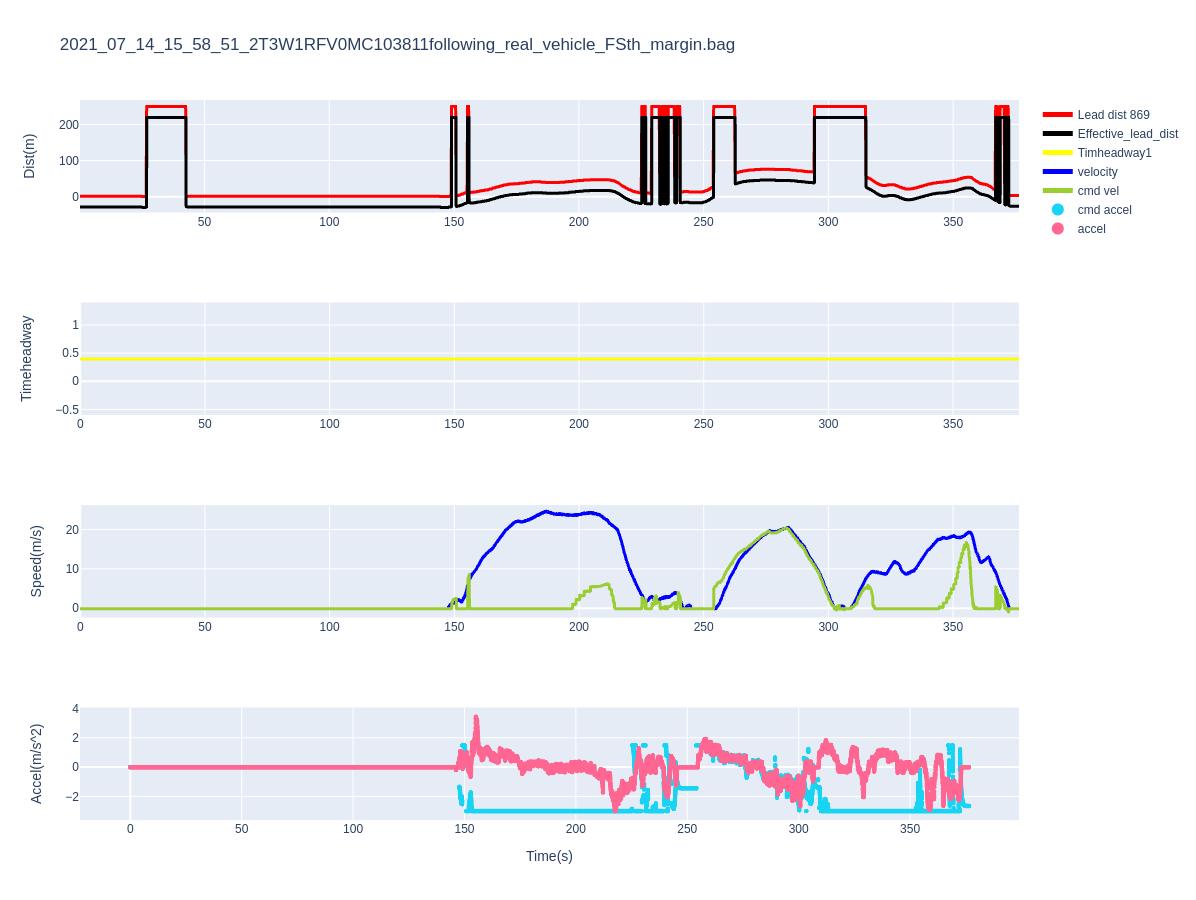

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
figr = make_subplots(rows=4, cols=1, subplot_titles=("", ""))

figr.append_trace(go.Scattergl(
    x=df_lead_dist['Time']-t0,
    y=df_lead_dist['data'],
     name="Lead dist 869",
      line=dict(
        width=3,
          color="red",
     ),
), row=1, col=1)

figr.append_trace(go.Scattergl(
    x=df_eff_lead_dist['Time']-t0,
    y=df_eff_lead_dist['data'],
     name="Effective_lead_dist",
      line=dict(
        width=3,
          color="black",
     ),
), row=1, col=1)

figr.append_trace(go.Scattergl(
    x=df_th_msg['Time']-t0,
    y=df_th_msg['data'],
     name="Timheadway1",
      line=dict(
        width=3,
          color="yellow",
     ),
), row=2, col=1)

figr.append_trace(go.Scattergl(
    x=df_vel['Time']-t0,
    y=df_vel['linear.x'],
          line=dict(
        width=3,
          color="blue",
     ),
    name="velocity",
), row=3, col=1)

figr.append_trace(go.Scattergl(
    x=df_cmd_vel['Time']-t0,
    y=df_cmd_vel['linear.x'],
          line=dict(
        width=3,
          color="yellowgreen",
     ),
    name="cmd vel",
), row=3, col=1)


figr.append_trace(go.Scattergl(
    x=df_cacc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_cacc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="cmd accel",
), row=4, col=1)
figr.append_trace(go.Scattergl(
    x=df_acc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_acc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="accel",
), row=4, col=1)

figr.update_xaxes(title_text="Time(s)", row=4, col=1)

figr.update_yaxes(title_text="Dist(m)", row=1, col=1)
# figr.update_yaxes(title_text="Effective lead dist", row=2, col=1)
figr.update_yaxes(title_text="Timeheadway", row=2, col=1)
figr.update_yaxes(title_text="Speed(m/s)", row=3, col=1)
figr.update_yaxes(title_text="Accel(m/s^2)", row=4, col=1)




figr.update_layout(height=900, width=900, legend = {'itemsizing': 'constant'} ,title_text=filename)
figr.show()